<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_Pre_Op_Data_Post_op_DASI_MET_Regression_01_04_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
'''
!pip install ipywidgets
!pip install IPython
!pip install graphviz
'''


import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )
  sns.set(rc={'figure.figsize':(8,8)})
  '''
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )
  '''

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data




def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}


def viz_trees(model,fn,cn,upto):
  fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,8), dpi=900)
  for index in range(upto):
      tree.plot_tree(model.estimators_[index],
                    feature_names = fn,
                    class_names=cn,
                    filled = True,
                    ax = axes[index]);

      axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
  fig.savefig(str(model)+'.png')




def viz_single_tree(model,fn,cn,est):
  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,27), dpi=500)
  tree.plot_tree(model.estimators_[est],
                feature_names = fn,
                class_names=cn,
                filled = True);
  fig.savefig(str(model)+'.png')


!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

#***Dataset Read***

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("C:/Users/MADE Lab/Desktop/Anaconda/Fitbit/Fitabase_DataMerge_LessRaw_12.15.2023_nanReplaced_rev6.csv")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Feature Matrix/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/Fitabase_DataMerge_LessRaw_09.30.2023_nanReplaced.csv")
#dataset=pd.read_csv("C:/Users/Richard/Desktop/Fitbit/Fitabase_DataMerge_LessRaw_09.30.2023_nanReplaced.csv")
dataset = pd.read_csv('/content/Fitabase_DataMerge_LessRaw_12.15.2023_nanReplaced_rev6.csv')

In [4]:
dataset.head(10)

,Patient_Id,Condition,HR_MAX(BPM),aEE_MAX(J/min),Status_aEEmax,slope_HR/Calories,Intercept_HR/Calories,1_min_HR_Recovery,2_min_HR_Recovery,3_min_HR_Recovery,...,Unnamed: 352,Cumulative 30-Day POMS Score.1,Cumulative 5-Day POMS Score.1,Pre-Op HAQ-DI section sum:.1,Post-Op HAQ-DI section sum total:.1,Unnamed: 357.1,Pre-Op DASI - VO2 peak score:.1,Pre-Op DASI score in METS:.1,Post-Op DASI - VO2 peak score:.1,Post-Op DASI Score in METS.1
0,001-JV,pre,149,68.22,Low Risk,1.319097,59.013030,3.894737,10.751880,13.789474,...,NaN,0,NaN,5,5.0,NaN,22.60,6.45,27.96,7.98
1,001-JV,post,149,63.90,Low Risk,1.445584,56.622563,3.570175,10.175439,13.131579,...,NaN,0,NaN,5,5.0,NaN,22.60,6.45,27.96,7.98
2,002-JR,pre,137,63.81,Low Risk,1.146421,63.844702,6.425926,18.185185,22.981481,...,NaN,0,NaN,0,4.0,NaN,34.63,9.90,23.45,6.70
3,002-JR,post,145,58.01,Immediate Risk,1.358319,66.200422,4.010000,9.550000,13.400000,...,NaN,0,NaN,0,4.0,NaN,34.63,9.90,23.45,6.70
4,003-ES,pre,130,34.42,High Risk,2.083209,58.302814,3.269231,9.153846,13.923077,...,NaN,0,NaN,2,5.0,NaN,24.52,7.00,24.52,7.00
5,003-ES,post,130,32.01,High Risk,2.403864,53.053092,4.098485,10.719697,14.553030,...,NaN,0,NaN,2,5.0,NaN,24.52,7.00,24.52,7.00
6,004-LY,pre,165,51.24,Immediate Risk,2.026975,61.141661,3.779661,9.033898,12.644068,...,NaN,0,NaN,0,1.0,NaN,34.63,9.90,13.88,3.97
7,004-LY,post,154,77.38,Low Risk,1.038602,73.637312,3.748031,9.811024,13.181102,...,NaN,0,NaN,0,1.0,NaN,34.63,9.90,13.88,3.97
8,005-DF,pre,179,83.00,Low Risk,1.499019,54.588545,4.246377,10.594203,15.724638,...,NaN,0,NaN,0,0.0,NaN,34.63,9.90,34.63,9.90
9,005-DF,post,155,82.09,Low Risk,1.187825,57.488116,3.525114,9.474886,13.963470,...,NaN,0,NaN,0,0.0,NaN,34.63,9.90,34.63,9.90


**<font color='coral'>Adding VO2_Max_6MWT</font>**

In [5]:
dataset.columns

Index(['Patient_Id', 'Condition', 'HR_MAX(BPM)', 'aEE_MAX(J/min)',
       'Status_aEEmax', 'slope_HR/Calories', 'Intercept_HR/Calories',
       '1_min_HR_Recovery', '2_min_HR_Recovery', '3_min_HR_Recovery',
       ...
       'Unnamed: 352', 'Cumulative 30-Day POMS Score.1',
       'Cumulative 5-Day POMS Score.1', 'Pre-Op HAQ-DI section sum:.1',
       'Post-Op HAQ-DI section sum total:.1', 'Unnamed: 357.1',
       'Pre-Op DASI - VO2 peak score:.1', 'Pre-Op DASI score in METS:.1',
       'Post-Op DASI - VO2 peak score:.1', 'Post-Op DASI Score in METS.1'],
      dtype='object', length=805)

#Split Dataset into pre and post

In [6]:
pre_dataset = dataset.query("Condition == 'pre'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post'").reset_index(drop=True)


In [7]:
dataset = post_dataset

# **Regression Plot (aEE VS 6MWT)**

In [8]:
dataset

,Patient_Id,Condition,HR_MAX(BPM),aEE_MAX(J/min),Status_aEEmax,slope_HR/Calories,Intercept_HR/Calories,1_min_HR_Recovery,2_min_HR_Recovery,3_min_HR_Recovery,...,Unnamed: 352,Cumulative 30-Day POMS Score.1,Cumulative 5-Day POMS Score.1,Pre-Op HAQ-DI section sum:.1,Post-Op HAQ-DI section sum total:.1,Unnamed: 357.1,Pre-Op DASI - VO2 peak score:.1,Pre-Op DASI score in METS:.1,Post-Op DASI - VO2 peak score:.1,Post-Op DASI Score in METS.1
0,001-JV,post,149,63.90,Low Risk,1.445584,56.622563,3.570175,10.175439,13.131579,...,NaN,0,NaN,5,5.00000,NaN,22.60,6.45,27.960000,7.980000
1,002-JR,post,145,58.01,Immediate Risk,1.358319,66.200422,4.010000,9.550000,13.400000,...,NaN,0,NaN,0,4.00000,NaN,34.63,9.90,23.450000,6.700000
2,003-ES,post,130,32.01,High Risk,2.403864,53.053092,4.098485,10.719697,14.553030,...,NaN,0,NaN,2,5.00000,NaN,24.52,7.00,24.520000,7.000000
3,004-LY,post,154,77.38,Low Risk,1.038602,73.637312,3.748031,9.811024,13.181102,...,NaN,0,NaN,0,1.00000,NaN,34.63,9.90,13.880000,3.970000
4,005-DF,post,155,82.09,Low Risk,1.187825,57.488116,3.525114,9.474886,13.963470,...,NaN,0,NaN,0,0.00000,NaN,34.63,9.90,34.630000,9.900000
5,006-MK,post,122,24.51,High Risk,2.573758,58.923593,4.652695,11.820359,15.868263,...,NaN,2,NaN,5,8.00000,NaN,20.01,5.70,18.500000,5.290000
6,007-DD,post,138,26.34,High Risk,2.960977,60.020387,3.000000,8.125000,11.250000,...,NaN,0,NaN,6,8.00000,NaN,18.18,5.20,21.000000,6.000000
7,008-KL,post,161,79.84,Low Risk,1.054272,76.826135,5.023810,13.619048,18.119048,...,NaN,0,NaN,0,0.00000,NaN,26.00,7.44,23.400000,6.700000
8,010-ML,post,148,53.98,Immediate Risk,1.693959,56.552226,5.586957,17.434783,22.608696,...,NaN,0,NaN,0,0.00000,NaN,34.63,9.90,28.000000,7.980000
9,011-CR,post,140,41.05,High Risk,1.644221,72.505365,3.844660,10.854369,14.854369,...,NaN,0,NaN,6,2.00000,NaN,27.96,8.00,26.030000,7.400000


In [9]:

#last_index = dataset.columns.get_loc("VO2_aEEmax(ml/kg/min)")+1

#last_index1 = dataset.columns.get_loc("qc_date")+1


dataset = dataset.iloc[:,:]

#Custom Feature Selection

In [10]:
'''
all_columns = list(dataset.columns)
new_keys=items_check_box(all_columns)
'''

'\nall_columns = list(dataset.columns)\nnew_keys=items_check_box(all_columns)\n'

In [11]:
'''
new_features = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_features.append(all_columns[i])
'''

'\nnew_features = []\nfor i in range(len(new_keys)):\n  if new_keys[i].value ==True:\n    new_features.append(all_columns[i])\n'

In [12]:
new_features1 =[
 'Patient_Id',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 '1_min_HR_Recovery',
 '2_min_HR_Recovery',
 '3_min_HR_Recovery',
 '4_min_HR_Recovery',
 '5_min_HR_Recovery',
 'hr_mean_Extreme',
 'hr_mean_Heavy',
 'hr_mean_Moderate',
 'hr_mean_Light',
 'hr_min_Extreme',
 'hr_min_Heavy',
 'hr_min_Moderate',
 'hr_min_Light',
 'hr_max_Extreme',
 'hr_max_Heavy',
 'hr_max_Moderate',
 'hr_max_Light',
 'hr_std_Extreme',
 'hr_std_Heavy',
 'hr_std_Moderate',
 'hr_std_Light',
 'sdnn_Extreme',
 'sdnn_Heavy',
 'sdnn_Moderate',
 'sdnn_Light',
 'sdann_Extreme',
 'sdann_Heavy',
 'sdann_Moderate',
 'sdann_Light',
 'rmssd_Extreme',
 'rmssd_Heavy',
 'rmssd_Moderate',
 'rmssd_Light',
 'sdsd_Extreme',
 'sdsd_Heavy',
 'sdsd_Moderate',
 'sdsd_Light',
 'nn50_Extreme',
 'nn50_Heavy',
 'nn50_Moderate',
 'nn50_Light',
 'pnn50_Extreme',
 'pnn50_Heavy',
 'pnn50_Moderate',
 'pnn50_Light',
 'nn20_Extreme',
 'nn20_Heavy',
 'nn20_Moderate',
 'nn20_Light',
 'pnn20_Extreme',
 'pnn20_Heavy',
 'pnn20_Moderate',
 'pnn20_Light',
 'fft_ratio_Extreme',
 'fft_ratio_Heavy',
 'fft_ratio_Moderate',
 'fft_ratio_Light',
 'fft_total_Extreme',
 'fft_total_Heavy',
 'fft_total_Moderate',
 'fft_total_Light',
 'lomb_rel_vlf_Extreme',
 'lomb_rel_vlf_Heavy',
 'lomb_rel_vlf_Moderate',
 'lomb_rel_vlf_Light',
 'lomb_rel_lf_Extreme',
 'lomb_rel_lf_Heavy',
 'lomb_rel_lf_Moderate',
 'lomb_rel_lf_Light',
 'lomb_rel_hf_Extreme',
 'lomb_rel_hf_Heavy',
 'lomb_rel_hf_Moderate',
 'lomb_rel_hf_Light',
 'sd1_Extreme',
 'sd1_Heavy',
 'sd1_Moderate',
 'sd1_Light',
 'sd2_Extreme',
 'sd2_Heavy',
 'sd2_Moderate',
 'sd2_Light',
 'sd_ratio_Extreme',
 'sd_ratio_Heavy',
 'sd_ratio_Moderate',
 'sd_ratio_Light',
 'ellipse_area_Extreme',
 'ellipse_area_Heavy',
 'ellipse_area_Moderate',
 'ellipse_area_Light',
 'sampen_Extreme',
 'sampen_Heavy',
 'sampen_Moderate',
 'sampen_Light',
 'dfa_alpha1_Extreme',
 'dfa_alpha1_Heavy',
 'dfa_alpha1_Moderate',
 'dfa_alpha1_Light',
 'dfa_alpha2_Extreme',
 'dfa_alpha2_Heavy',
 'dfa_alpha2_Moderate',
 'dfa_alpha2_Light',
 'Post-Op DASI - VO2 peak score:',

 ]

In [13]:
new_features2 = [
 'Patient_Id',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 '1_min_HR_Recovery',
 '2_min_HR_Recovery',
 '3_min_HR_Recovery',
 '4_min_HR_Recovery',
 '5_min_HR_Recovery',
 'hr_mean_Extreme',
 'hr_mean_Heavy',
 'hr_mean_Moderate',
 'hr_mean_Light',
 'hr_min_Extreme',
 'hr_min_Heavy',
 'hr_min_Moderate',
 'hr_min_Light',
 'hr_max_Extreme',
 'hr_max_Heavy',
 'hr_max_Moderate',
 'hr_max_Light',
 'sdnn_Extreme',
 'sdnn_Heavy',
 'sdnn_Moderate',
 'sdnn_Light',
 'sdann_Extreme',
 'sdann_Heavy',
 'sdann_Moderate',
 'sdann_Light',
 'rmssd_Extreme',
 'rmssd_Heavy',
 'rmssd_Moderate',
 'rmssd_Light',
 'sdsd_Extreme',
 'sdsd_Heavy',
 'sdsd_Moderate',
 'sdsd_Light',
 'nn50_Extreme',
 'nn50_Heavy',
 'nn50_Moderate',
 'nn50_Light',
 'pnn50_Extreme',
 'pnn50_Heavy',
 'pnn50_Moderate',
 'pnn50_Light',
 'nn20_Extreme',
 'nn20_Heavy',
 'nn20_Moderate',
 'nn20_Light',
 'pnn20_Extreme',
 'pnn20_Heavy',
 'pnn20_Moderate',
 'pnn20_Light',
 'fft_ratio_Extreme',
 'fft_ratio_Heavy',
 'fft_ratio_Moderate',
 'fft_ratio_Light',
 'fft_total_Extreme',
 'fft_total_Heavy',
 'fft_total_Moderate',
 'fft_total_Light',
 'sd1_Extreme',
 'sd1_Heavy',
 'sd1_Moderate',
 'sd1_Light',
 'sd2_Extreme',
 'sd2_Heavy',
 'sd2_Moderate',
 'sd2_Light',
 'sd_ratio_Extreme',
 'sd_ratio_Heavy',
 'sd_ratio_Moderate',
 'sd_ratio_Light',
 'dfa_alpha1_Extreme',
 'dfa_alpha1_Heavy',
 'dfa_alpha1_Moderate',
 'dfa_alpha1_Light',
 'dfa_alpha2_Extreme',
 'dfa_alpha2_Heavy',
 'dfa_alpha2_Moderate',
 'dfa_alpha2_Light',
 'Post-Op HAQ-DI section sum total:']

In [14]:
new_features3 = [
 'Patient_Id',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 '1_min_HR_Recovery',
 '2_min_HR_Recovery',
 '3_min_HR_Recovery',
 '4_min_HR_Recovery',
 '5_min_HR_Recovery',
 'hr_mean_Extreme',
 'hr_mean_Heavy',
 'hr_mean_Moderate',
 'hr_mean_Light',
 'hr_min_Extreme',
 'hr_min_Heavy',
 'hr_min_Moderate',
 'hr_min_Light',
 'hr_max_Extreme',
 'hr_max_Heavy',
 'hr_max_Moderate',
 'hr_max_Light',
 'hr_std_Extreme',
 'hr_std_Heavy',
 'hr_std_Moderate',
 'hr_std_Light',
 'sdnn_Extreme',
 'sdnn_Heavy',
 'sdnn_Moderate',
 'sdnn_Light',
 'sdnn_index_Extreme',
 'sdnn_index_Heavy',
 'sdnn_index_Moderate',
 'sdnn_index_Light',
 'sdann_Extreme',
 'sdann_Heavy',
 'sdann_Moderate',
 'sdann_Light',
 'rmssd_Extreme',
 'rmssd_Heavy',
 'rmssd_Moderate',
 'rmssd_Light',
 'sdsd_Extreme',
 'sdsd_Heavy',
 'sdsd_Moderate',
 'sdsd_Light',
 'nn50_Extreme',
 'nn50_Heavy',
 'nn50_Moderate',
 'nn50_Light',
 'pnn50_Extreme',
 'pnn50_Heavy',
 'pnn50_Moderate',
 'pnn50_Light',
 'nn20_Extreme',
 'nn20_Heavy',
 'nn20_Moderate',
 'nn20_Light',
 'pnn20_Extreme',
 'pnn20_Heavy',
 'pnn20_Moderate',
 'pnn20_Light',
 'fft_norm_low_Extreme',
 'fft_norm_low_Heavy',
 'fft_norm_low_Moderate',
 'fft_norm_low_Light',
 'fft_norm_high_Extreme',
 'fft_norm_high_Heavy',
 'fft_norm_high_Moderate',
 'fft_norm_high_Light',
 'fft_ratio_Extreme',
 'fft_ratio_Heavy',
 'fft_ratio_Moderate',
 'fft_ratio_Light',
 'fft_total_Extreme',
 'fft_total_Heavy',
 'fft_total_Moderate',
 'fft_total_Light',
 'sd1_Extreme',
 'sd1_Heavy',
 'sd1_Moderate',
 'sd1_Light',
 'sd2_Extreme',
 'sd2_Heavy',
 'sd2_Moderate',
 'sd2_Light',
 'sd_ratio_Extreme',
 'sd_ratio_Heavy',
 'sd_ratio_Moderate',
 'sd_ratio_Light',
 'ellipse_area_Extreme',
 'ellipse_area_Heavy',
 'ellipse_area_Moderate',
 'ellipse_area_Light',
 'sampen_Extreme',
 'sampen_Heavy',
 'sampen_Moderate',
 'sampen_Light',
 'dfa_alpha1_Extreme',
 'dfa_alpha1_Heavy',
 'dfa_alpha1_Moderate',
 'dfa_alpha1_Light',
 'dfa_alpha2_Extreme',
 'dfa_alpha2_Heavy',
 'dfa_alpha2_Moderate',
 'dfa_alpha2_Light',
 'Post-Op HAQ-DI section sum total:']

In [15]:
new_dataset = dataset.loc[:,new_features1]

In [16]:
new_dataset

,Patient_Id,Condition,HR_MAX(BPM),aEE_MAX(J/min),slope_HR/Calories,Intercept_HR/Calories,1_min_HR_Recovery,2_min_HR_Recovery,3_min_HR_Recovery,4_min_HR_Recovery,...,sampen_Light,dfa_alpha1_Extreme,dfa_alpha1_Heavy,dfa_alpha1_Moderate,dfa_alpha1_Light,dfa_alpha2_Extreme,dfa_alpha2_Heavy,dfa_alpha2_Moderate,dfa_alpha2_Light,Post-Op DASI - VO2 peak score:
0,001-JV,post,149,63.90,1.445584,56.622563,3.570175,10.175439,13.131579,16.224490,...,1.169013,1.656942,1.441146,1.572869,1.459481,1.047326,0.622236,1.174441,0.825180,27.960000
1,002-JR,post,145,58.01,1.358319,66.200422,4.010000,9.550000,13.400000,17.918919,...,1.098449,1.534237,1.540416,1.346098,1.454099,1.101130,0.925056,1.184640,0.876967,23.450000
2,003-ES,post,130,32.01,2.403864,53.053092,4.098485,10.719697,14.553030,18.206349,...,1.261865,1.327419,1.403803,1.485931,1.368096,0.747984,0.930706,1.167314,0.833317,24.520000
3,004-LY,post,154,77.38,1.038602,73.637312,3.748031,9.811024,13.181102,16.034483,...,1.212231,1.656942,1.302039,1.478145,1.445145,1.047326,1.297376,0.571179,0.936791,13.880000
4,005-DF,post,155,82.09,1.187825,57.488116,3.525114,9.474886,13.963470,19.130000,...,0.854391,1.622851,1.655245,1.562152,1.585125,1.195685,0.708183,0.844562,0.982177,34.630000
5,006-MK,post,122,24.51,2.573758,58.923593,4.652695,11.820359,15.868263,18.074627,...,1.283837,1.509086,1.749303,1.557456,1.485806,0.987483,1.454770,0.829246,0.856834,18.500000
6,007-DD,post,138,26.34,2.960977,60.020387,3.000000,8.125000,11.250000,15.255319,...,0.961629,1.670756,1.522654,1.487963,1.562906,0.977501,0.940868,0.902807,0.938632,21.000000
7,008-KL,post,161,79.84,1.054272,76.826135,5.023810,13.619048,18.119048,25.166667,...,1.163654,1.706955,1.305979,1.539520,1.433860,0.525046,0.765812,1.411057,0.865775,23.400000
8,010-ML,post,148,53.98,1.693959,56.552226,5.586957,17.434783,22.608696,29.052632,...,1.170136,1.534237,1.540416,1.616016,1.258854,1.101130,0.925056,0.468375,0.604826,28.000000
9,011-CR,post,140,41.05,1.644221,72.505365,3.844660,10.854369,14.854369,19.477273,...,1.246019,1.463927,1.429421,1.457956,1.395652,0.526059,0.856951,0.200297,0.812112,26.030000


# ***Preprocessing ***

**<font color='coral'>Null Dropping</font>**

In [17]:
new_dataset = new_dataset.dropna(axis=1,how='all') #column elemination
new_dataset = new_dataset.reset_index(drop=True)

**<font color='coral'>Check Null data count per column</font>**

In [18]:
null_cols = new_dataset.columns[new_dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",new_dataset[i].isna().sum().sum())
print('Total null: ',new_dataset.isna().sum().sum())

Total null:  0


**<font color='coral'>Filtering: <font color='blue'>Replacing null with mean if possible. (condition on `Patient_Id, Condition, Activity`)</font>**

In [19]:
%%capture
null_cols = new_dataset.columns[new_dataset.isnull().any()].tolist()

for current_col in null_cols:

  print(current_col)
  null_index = list(np.where(new_dataset[current_col].isna())[0])

  sub_con_act = []



  for i in null_index:
    if (new_dataset["Patient_Id"][i],new_dataset["Condition"][i]) not in sub_con_act:
      sub_con_act.append((new_dataset["Patient_Id"][i],new_dataset["Condition"][i]))


  for j in sub_con_act:
    temp_df = new_dataset.query("Condition == '"+j[1]+"' and Patient_Id == '"+j[0]+"'")

    #calculating mean
    temp_mean = temp_df[current_col].mean()

    for i in list(temp_df.index):
      if str(new_dataset[current_col][i]) == 'nan':
        new_dataset[current_col][i] = temp_mean


**<font color='coral'>Check Null data count per column after replacing</font>**

In [20]:
null_cols = new_dataset.columns[new_dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",new_dataset[i].isna().sum().sum())
print('Total null: ',new_dataset.isna().sum().sum())

Total null:  0


**removing rest of the null value**

In [21]:
new_dataset.dropna(axis=0, how='any', inplace = True) #row elemination
new_dataset = new_dataset.reset_index(drop=True)

In [22]:
new_dataset.shape

(59, 104)

#Sliting X & y

In [23]:
y_i = widgets.RadioButtons(
    options=new_features1,
    description='Select Y:',
    disabled=False
)
y_i

RadioButtons(description='Select Y:', options=('Patient_Id', 'Condition', 'HR_MAX(BPM)', 'aEE_MAX(J/min)', 'sl…

In [24]:
target = 'Post-Op DASI - VO2 peak score:'

In [25]:
new_dataset

,Patient_Id,Condition,HR_MAX(BPM),aEE_MAX(J/min),slope_HR/Calories,Intercept_HR/Calories,1_min_HR_Recovery,2_min_HR_Recovery,3_min_HR_Recovery,4_min_HR_Recovery,...,sampen_Light,dfa_alpha1_Extreme,dfa_alpha1_Heavy,dfa_alpha1_Moderate,dfa_alpha1_Light,dfa_alpha2_Extreme,dfa_alpha2_Heavy,dfa_alpha2_Moderate,dfa_alpha2_Light,Post-Op DASI - VO2 peak score:
0,001-JV,post,149,63.90,1.445584,56.622563,3.570175,10.175439,13.131579,16.224490,...,1.169013,1.656942,1.441146,1.572869,1.459481,1.047326,0.622236,1.174441,0.825180,27.960000
1,002-JR,post,145,58.01,1.358319,66.200422,4.010000,9.550000,13.400000,17.918919,...,1.098449,1.534237,1.540416,1.346098,1.454099,1.101130,0.925056,1.184640,0.876967,23.450000
2,003-ES,post,130,32.01,2.403864,53.053092,4.098485,10.719697,14.553030,18.206349,...,1.261865,1.327419,1.403803,1.485931,1.368096,0.747984,0.930706,1.167314,0.833317,24.520000
3,004-LY,post,154,77.38,1.038602,73.637312,3.748031,9.811024,13.181102,16.034483,...,1.212231,1.656942,1.302039,1.478145,1.445145,1.047326,1.297376,0.571179,0.936791,13.880000
4,005-DF,post,155,82.09,1.187825,57.488116,3.525114,9.474886,13.963470,19.130000,...,0.854391,1.622851,1.655245,1.562152,1.585125,1.195685,0.708183,0.844562,0.982177,34.630000
5,006-MK,post,122,24.51,2.573758,58.923593,4.652695,11.820359,15.868263,18.074627,...,1.283837,1.509086,1.749303,1.557456,1.485806,0.987483,1.454770,0.829246,0.856834,18.500000
6,007-DD,post,138,26.34,2.960977,60.020387,3.000000,8.125000,11.250000,15.255319,...,0.961629,1.670756,1.522654,1.487963,1.562906,0.977501,0.940868,0.902807,0.938632,21.000000
7,008-KL,post,161,79.84,1.054272,76.826135,5.023810,13.619048,18.119048,25.166667,...,1.163654,1.706955,1.305979,1.539520,1.433860,0.525046,0.765812,1.411057,0.865775,23.400000
8,010-ML,post,148,53.98,1.693959,56.552226,5.586957,17.434783,22.608696,29.052632,...,1.170136,1.534237,1.540416,1.616016,1.258854,1.101130,0.925056,0.468375,0.604826,28.000000
9,011-CR,post,140,41.05,1.644221,72.505365,3.844660,10.854369,14.854369,19.477273,...,1.246019,1.463927,1.429421,1.457956,1.395652,0.526059,0.856951,0.200297,0.812112,26.030000


In [26]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'values': np.random.randint(0, 100, 100)}
df = pd.DataFrame(data)

# Define the bins for the ranges
bins = [0, 20, 40, 60, 80, 100]  # You can adjust the bin edges as needed

# Use pd.cut to categorize the values into bins
df['value_ranges'] = pd.cut(df['values'], bins=bins, include_lowest=True)

# Count the occurrences of each range
range_counts = df['value_ranges'].value_counts().sort_index()

# Print or use the range counts
print(range_counts)
df

(-0.001, 20.0]    21
(20.0, 40.0]      20
(40.0, 60.0]      25
(60.0, 80.0]      21
(80.0, 100.0]     13
Name: value_ranges, dtype: int64


,values,value_ranges
0,69,"(60.0, 80.0]"
1,8,"(-0.001, 20.0]"
2,6,"(-0.001, 20.0]"
3,91,"(80.0, 100.0]"
4,55,"(40.0, 60.0]"
...,...,...
95,15,"(-0.001, 20.0]"
96,65,"(60.0, 80.0]"
97,53,"(40.0, 60.0]"
98,50,"(40.0, 60.0]"


In [27]:
X = new_dataset.loc[:, new_dataset.columns!=y_i.value]
#X = X.drop(['Patient_Id', 'Condition'], axis=1)

#y = new_dataset[y_i.value]
y = new_dataset[target]

fn=X.columns
cn=list(set(y))

new_dataset[target].value_counts()

31.400000    5
17.750000    4
29.140000    3
34.630000    3
15.100000    2
13.900000    2
19.700000    2
22.627813    2
17.700000    2
29.100000    2
23.120000    2
27.960000    2
26.000000    2
26.030000    2
28.000000    2
23.400000    2
18.500000    2
16.200000    2
14.950000    1
14.200000    1
23.800000    1
31.200000    1
25.400000    1
23.770000    1
25.700000    1
20.330000    1
11.500000    1
27.700000    1
23.450000    1
19.680000    1
21.000000    1
13.880000    1
24.520000    1
34.600000    1
Name: Post-Op DASI - VO2 peak score:, dtype: int64

In [28]:
import math

df_sorted = new_dataset.sort_values(by=target, ascending=True)
min_range, max_range = math.floor(df_sorted[target].min()),math.ceil(df_sorted[target].max())


range_gap = 5

populate_range = []

for i in range(min_range,100000,range_gap):
  if i >= max_range:
    break
  populate_range.append((i,i+range_gap-1))


In [72]:
import ipywidgets as widgets
from IPython.display import display

text_inputs = []
for i in range(len(populate_range)):

    text_train = widgets.Text(value='', description='Train:')
    text_test = widgets.Text(value='', description='Test:')
    text_inputs.append([text_train,text_test])




for t_i in range(len(text_inputs)):
    temp_data=new_dataset[(new_dataset[target] >= populate_range[t_i][0]) & ( new_dataset[target] <= populate_range[t_i][1])]
    print("Range:",(populate_range[t_i]),"---- Total Row: ",temp_data.shape[0])
    display(text_inputs[t_i][0])
    display(text_inputs[t_i][1])
    print()

Range: (11, 15) ---- Total Row:  6


Text(value='', description='Train:')

Text(value='', description='Test:')


Range: (16, 20) ---- Total Row:  13


Text(value='', description='Train:')

Text(value='', description='Test:')


Range: (21, 25) ---- Total Row:  11


Text(value='', description='Train:')

Text(value='', description='Test:')


Range: (26, 30) ---- Total Row:  14


Text(value='', description='Train:')

Text(value='', description='Test:')


Range: (31, 35) ---- Total Row:  10


Text(value='', description='Train:')

Text(value='', description='Test:')

In [70]:

for t_i in range(len(text_inputs)):
    print(text_inputs[t_i][0].value)
    print(text_inputs[t_i][1].value)


3
4
5
6
4
5
4
4
4
7


In [57]:
entered_texts = [text_input.value for text_input in text_inputs]
print('Entered texts:', entered_texts)

Entered texts: ['d', 'f', 's', 'd', 'f']


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
new_dataset.head(80)

,Patient_Id,Condition,HR_MAX(BPM),aEE_MAX(J/min),slope_HR/Calories,Intercept_HR/Calories,1_min_HR_Recovery,2_min_HR_Recovery,3_min_HR_Recovery,4_min_HR_Recovery,...,sampen_Light,dfa_alpha1_Extreme,dfa_alpha1_Heavy,dfa_alpha1_Moderate,dfa_alpha1_Light,dfa_alpha2_Extreme,dfa_alpha2_Heavy,dfa_alpha2_Moderate,dfa_alpha2_Light,Post-Op DASI Score in METS
0,001-JV,post,149,63.90,1.445584,56.622563,3.570175,10.175439,13.131579,16.224490,...,1.169013,1.656942,1.441146,1.572869,1.459481,1.047326,0.622236,1.174441,0.825180,7.980000
1,002-JR,post,145,58.01,1.358319,66.200422,4.010000,9.550000,13.400000,17.918919,...,1.098449,1.534237,1.540416,1.346098,1.454099,1.101130,0.925056,1.184640,0.876967,6.700000
2,003-ES,post,130,32.01,2.403864,53.053092,4.098485,10.719697,14.553030,18.206349,...,1.261865,1.327419,1.403803,1.485931,1.368096,0.747984,0.930706,1.167314,0.833317,7.000000
3,004-LY,post,154,77.38,1.038602,73.637312,3.748031,9.811024,13.181102,16.034483,...,1.212231,1.656942,1.302039,1.478145,1.445145,1.047326,1.297376,0.571179,0.936791,3.970000
4,005-DF,post,155,82.09,1.187825,57.488116,3.525114,9.474886,13.963470,19.130000,...,0.854391,1.622851,1.655245,1.562152,1.585125,1.195685,0.708183,0.844562,0.982177,9.900000
5,006-MK,post,122,24.51,2.573758,58.923593,4.652695,11.820359,15.868263,18.074627,...,1.283837,1.509086,1.749303,1.557456,1.485806,0.987483,1.454770,0.829246,0.856834,5.290000
6,007-DD,post,138,26.34,2.960977,60.020387,3.000000,8.125000,11.250000,15.255319,...,0.961629,1.670756,1.522654,1.487963,1.562906,0.977501,0.940868,0.902807,0.938632,6.000000
7,008-KL,post,161,79.84,1.054272,76.826135,5.023810,13.619048,18.119048,25.166667,...,1.163654,1.706955,1.305979,1.539520,1.433860,0.525046,0.765812,1.411057,0.865775,6.700000
8,010-ML,post,148,53.98,1.693959,56.552226,5.586957,17.434783,22.608696,29.052632,...,1.170136,1.534237,1.540416,1.616016,1.258854,1.101130,0.925056,0.468375,0.604826,7.980000
9,011-CR,post,140,41.05,1.644221,72.505365,3.844660,10.854369,14.854369,19.477273,...,1.246019,1.463927,1.429421,1.457956,1.395652,0.526059,0.856951,0.200297,0.812112,7.400000


In [ ]:
new_dataset.to_csv('VitalDB_Features_shortlisted_01.03.2024_Post-Op HAQ-DI section sum total_1.csv', index=False)

In [ ]:
number_of_feat=int(input("Number Of Best Features: "))

per_score = []
for i in range(number_of_feat):
  per_score.append(1/(i+1))

**Feature Selection: Filter Method**

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']
lyst_filter=featureScores1.nlargest(number_of_feat,'Score')

lyst_filter["per_score"] = per_score
lyst_filter

,Specs,Score,per_score
2,slope_HR/Calories,3.474396,1.000000
72,lomb_rel_hf_Light,2.299144,0.500000
89,sampen_Extreme,2.012619,0.333333
63,lomb_rel_vlf_Moderate,2.006812,0.250000
55,fft_ratio_Moderate,1.674555,0.200000
100,dfa_alpha2_Light,1.650007,0.166667
9,hr_mean_Extreme,1.541341,0.142857
53,fft_ratio_Extreme,1.524907,0.125000
17,hr_max_Extreme,1.418330,0.111111
13,hr_min_Extreme,1.387410,0.100000


**Feature Selection: Tree-based Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X contains your feature matrix and y contains your target variable
model = RandomForestRegressor()  # Replace with your preferred model
model.fit(X, y)


dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']
lyst_tree=featureScores1.nlargest(number_of_feat,'Score')
lyst_tree["per_score"] = per_score

lyst_tree

,Specs,Score,per_score
7,4_min_HR_Recovery,0.099025,1.000000
68,lomb_rel_lf_Light,0.085461,0.500000
1,aEE_MAX(J/min),0.076336,0.333333
63,lomb_rel_vlf_Moderate,0.054380,0.250000
12,hr_mean_Light,0.052262,0.200000
8,5_min_HR_Recovery,0.047373,0.166667
20,hr_max_Light,0.042828,0.142857
2,slope_HR/Calories,0.039359,0.125000
16,hr_min_Light,0.039327,0.111111
5,2_min_HR_Recovery,0.028522,0.100000


In [ ]:
feature_col = []
score_per = []


#df_feature= pd.concat([lyst_filter,lyst_Pearson, lyst_wrp, lyst_tree] , ignore_index=True)

df_feature= pd.concat([lyst_tree] , ignore_index=True)

for i in df_feature['Specs'].unique():
  feature_col.append(i)
  score_per.append((df_feature.query("Specs == '"+i+"'")["per_score"].sum()))

dfscores = pd.DataFrame(score_per)
dfcolumns = pd.DataFrame(feature_col)
featureScores_per = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_per.columns = ['Specs','Per_Score']

featureScores_per= featureScores_per.sort_values(by = 'Per_Score',ascending = False).reset_index()
featureScores_per

,index,Specs,Per_Score
0,0,4_min_HR_Recovery,1.000000
1,1,lomb_rel_lf_Light,0.500000
2,2,aEE_MAX(J/min),0.333333
3,3,lomb_rel_vlf_Moderate,0.250000
4,4,hr_mean_Light,0.200000
5,5,5_min_HR_Recovery,0.166667
6,6,hr_max_Light,0.142857
7,7,slope_HR/Calories,0.125000
8,8,hr_min_Light,0.111111
9,9,2_min_HR_Recovery,0.100000


In [ ]:
final_list_feature = featureScores_per["Specs"][0:20].to_list()
final_list_feature

['4_min_HR_Recovery',
 'lomb_rel_lf_Light',
 'aEE_MAX(J/min)',
 'lomb_rel_vlf_Moderate',
 'hr_mean_Light',
 '5_min_HR_Recovery',
 'hr_max_Light',
 'slope_HR/Calories',
 'hr_min_Light',
 '2_min_HR_Recovery',
 'lomb_rel_hf_Moderate',
 'hr_max_Extreme',
 'sdsd_Moderate',
 'dfa_alpha1_Moderate',
 'lomb_rel_hf_Extreme',
 'pnn50_Light',
 '3_min_HR_Recovery',
 'fft_ratio_Moderate',
 'nn20_Light',
 'Intercept_HR/Calories']

In [ ]:
X_new = dataset.loc[:,final_list_feature]
y_new = dataset.iloc[:, 0]

In [ ]:
X = X_new
y = y



---



---





---



---





---



#Models

In [22]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [25]:

!pip install shap



import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.9 MB/s eta 0:00:00


In [30]:
X_train = X
y_train = y

#Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,15):
  rfr = RandomForestRegressor(max_depth=i)

  rfr.fit(X_train, y_train)
  y_pred = rfr.predict(X_train)
  r2=r2_score(y_train,y_pred)
  print("RF Training r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("RF Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

ValueError: could not convert string to float: 'post'

Testing r2:  0.9015114808317151
R_sq:  0.9015114808317151


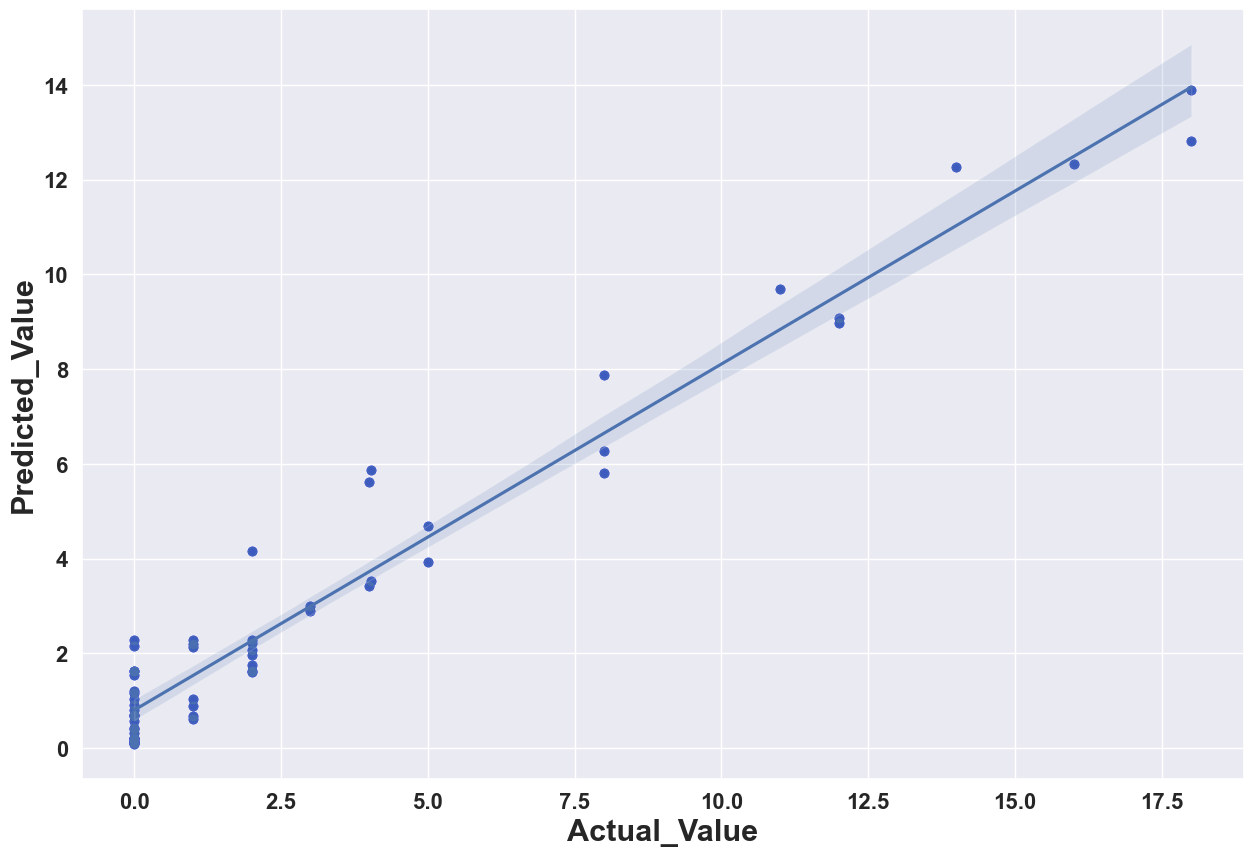

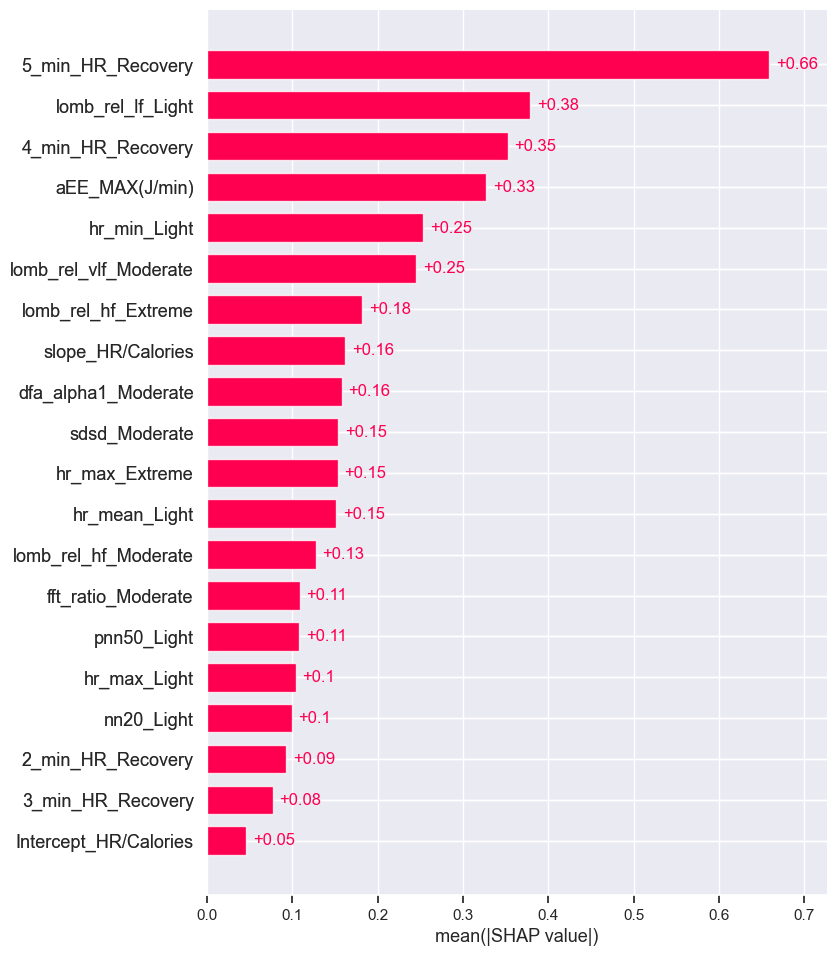

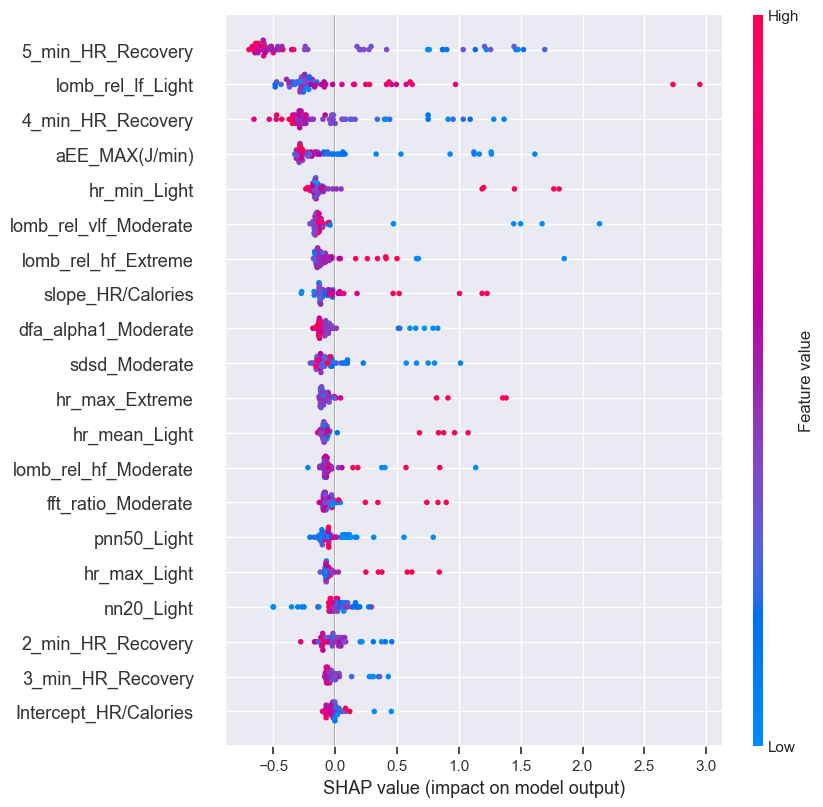

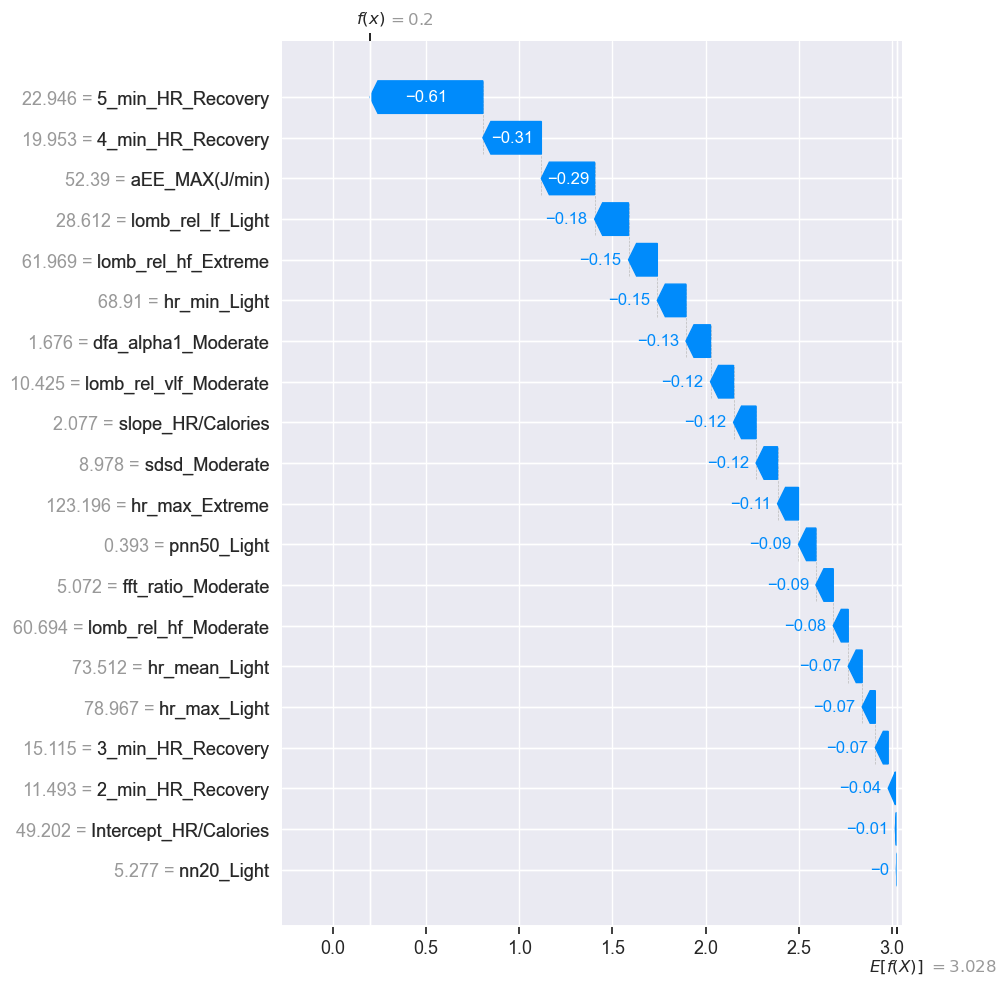

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = rfr.score(X_train, y_train)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
prim_plot(y_train,y_pred)
plt.show()

regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)

explainer2 = shap.Explainer(regr2, X_train)
check_additivity=False
shap_values2 = explainer2 (X_train, check_additivity=check_additivity)
shap.plots.bar(shap_values2,max_display=50)
shap.plots.beeswarm(shap_values2, max_display=50)
shap.plots.waterfall(shap_values2[20], max_display=50)



In [ ]:
'''
viz_trees(rfr,fn,['0','1','2'],2)
'''

"\nviz_trees(rfr,fn,['0','1','2'],2)\n"

In [ ]:
#pd.DataFrame(zip(X.columns, rfr.coef_))

In [ ]:
pip install pyCompare


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [ ]:
#pyCompare.blandAltman(y_train,y_pred, limitOfAgreement=1.96, confidenceInterval=95, confidenceIntervalMethod='approximate', detrend=None, percentage=False, **kwargs)

In [ ]:
#Linear Regression

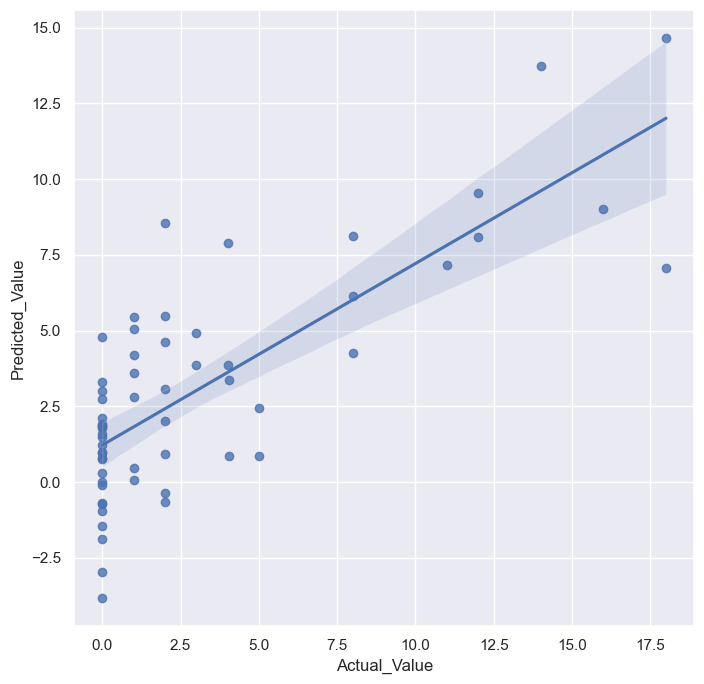

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

prim_plot(y_train,y_pred)


In [ ]:
#Feature Coefficient

In [ ]:
pd.DataFrame(zip(X.columns, lin_reg.coef_))

,0,1
0,4_min_HR_Recovery,0.156282
1,lomb_rel_lf_Light,2.312060
2,aEE_MAX(J/min),-0.013274
3,lomb_rel_vlf_Moderate,-1.248549
4,hr_mean_Light,2.538963
5,5_min_HR_Recovery,-0.409191
6,hr_max_Light,-1.442984
7,slope_HR/Calories,-1.535327
8,hr_min_Light,-0.883517
9,2_min_HR_Recovery,0.508166


In [ ]:
#Model Intercept

In [ ]:
lin_reg.intercept_

-47.67464905678528

Testing r2:  0.5991304552379602
R_sq:  0.5991304552379602


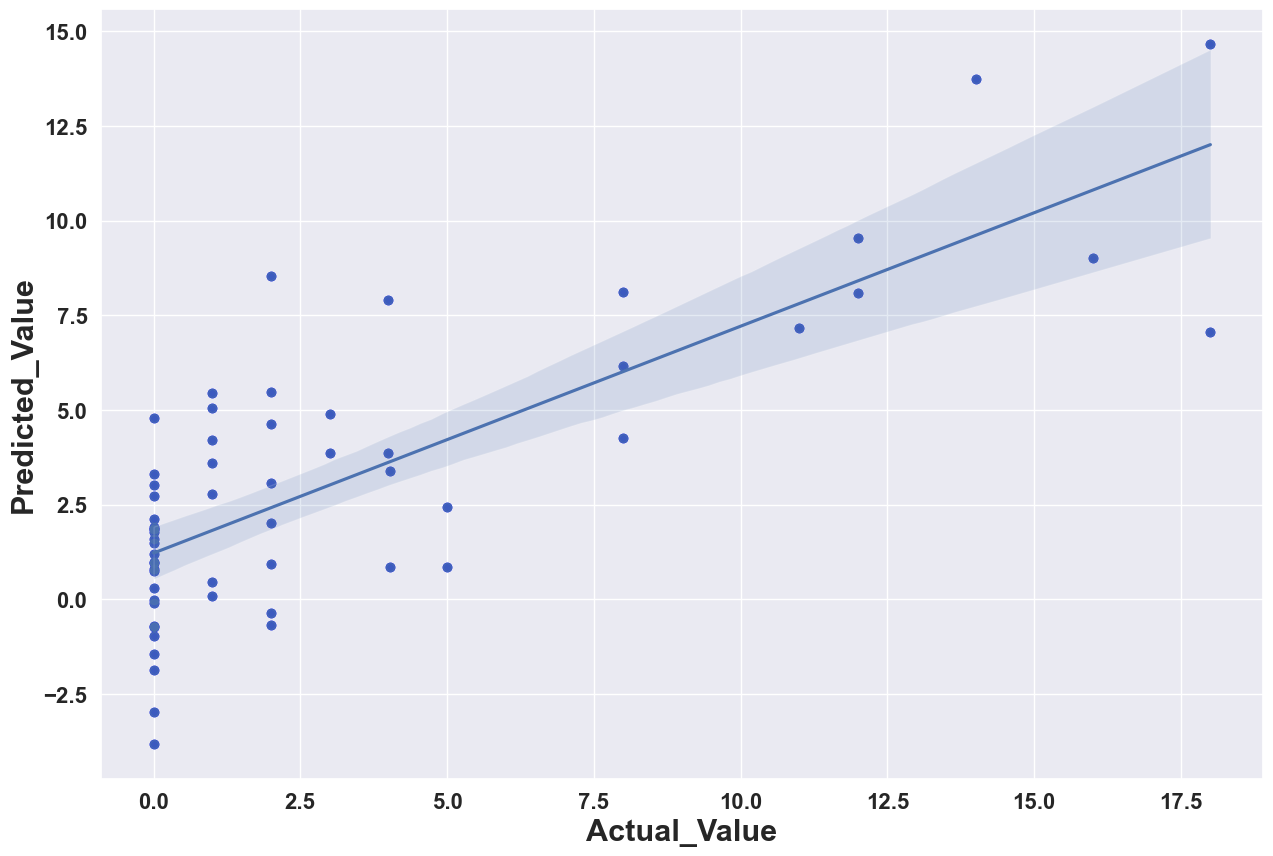

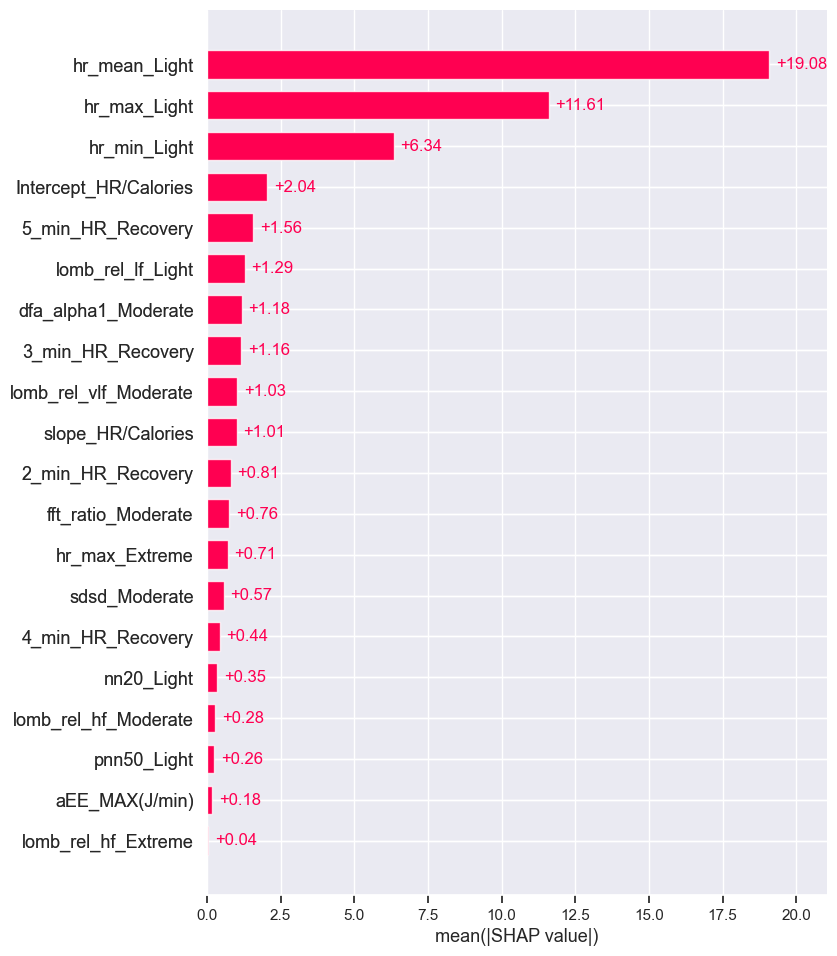

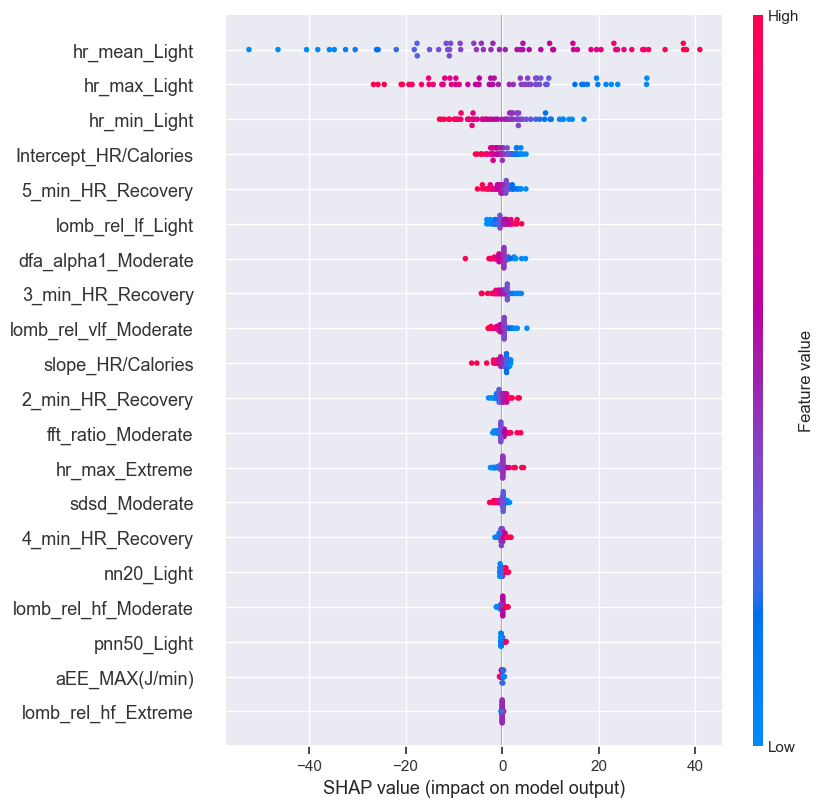

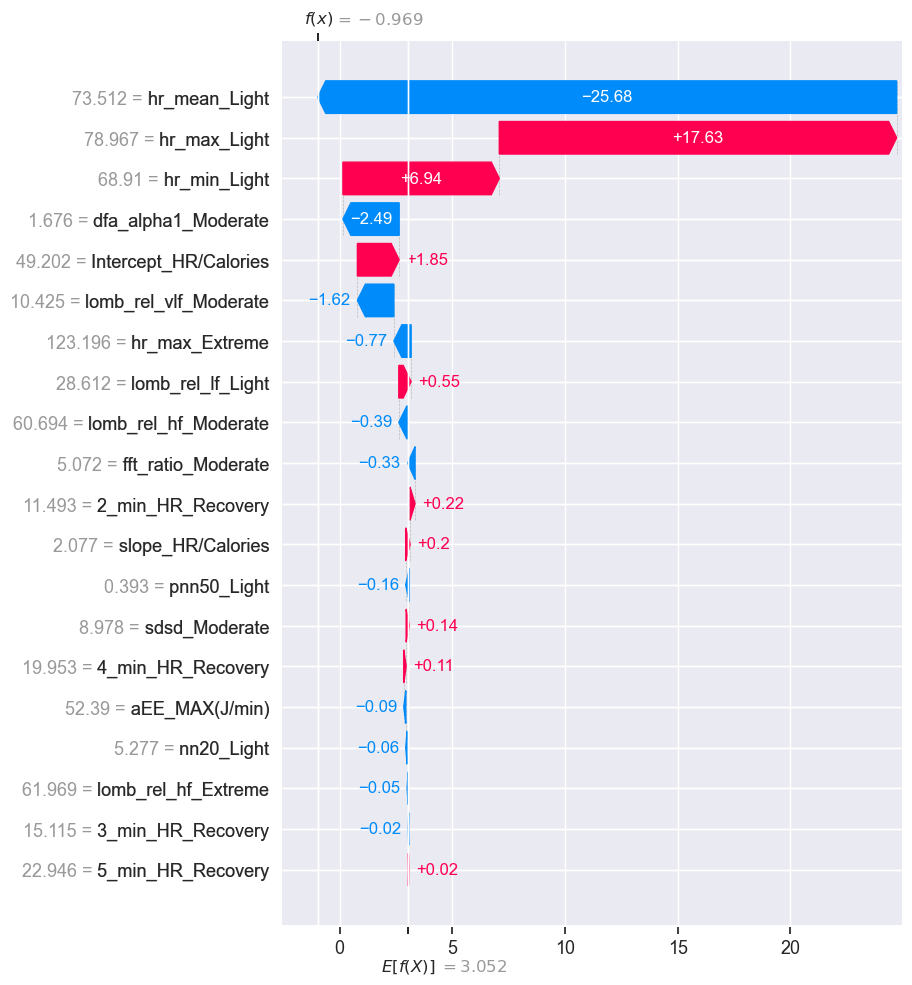

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = lin_reg.score(X_train, y_train)
print("R_sq: ",r_sq)





import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


lin_reg.fit(X_train, y_train)


explainer1 = shap.Explainer(lin_reg, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=50)
shap.plots.beeswarm(shap_values1, max_display=50)
shap.plots.waterfall(shap_values1[20], max_display=50)

#Kernel Ridge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
y_pred= krr.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

'''

Training
Mean absolute error = 2.42
Mean squared error = 10.02
Median absolute error = 2.33
Explain variance score = 0.55
R2 score = 0.55


'\nprint("Testing")\npred_test= krr.predict(X_test)\nres(y_test,pred_test)\n\n'

Testing r2:  0.5533077922354668
R_sq:  0.5533077922354668


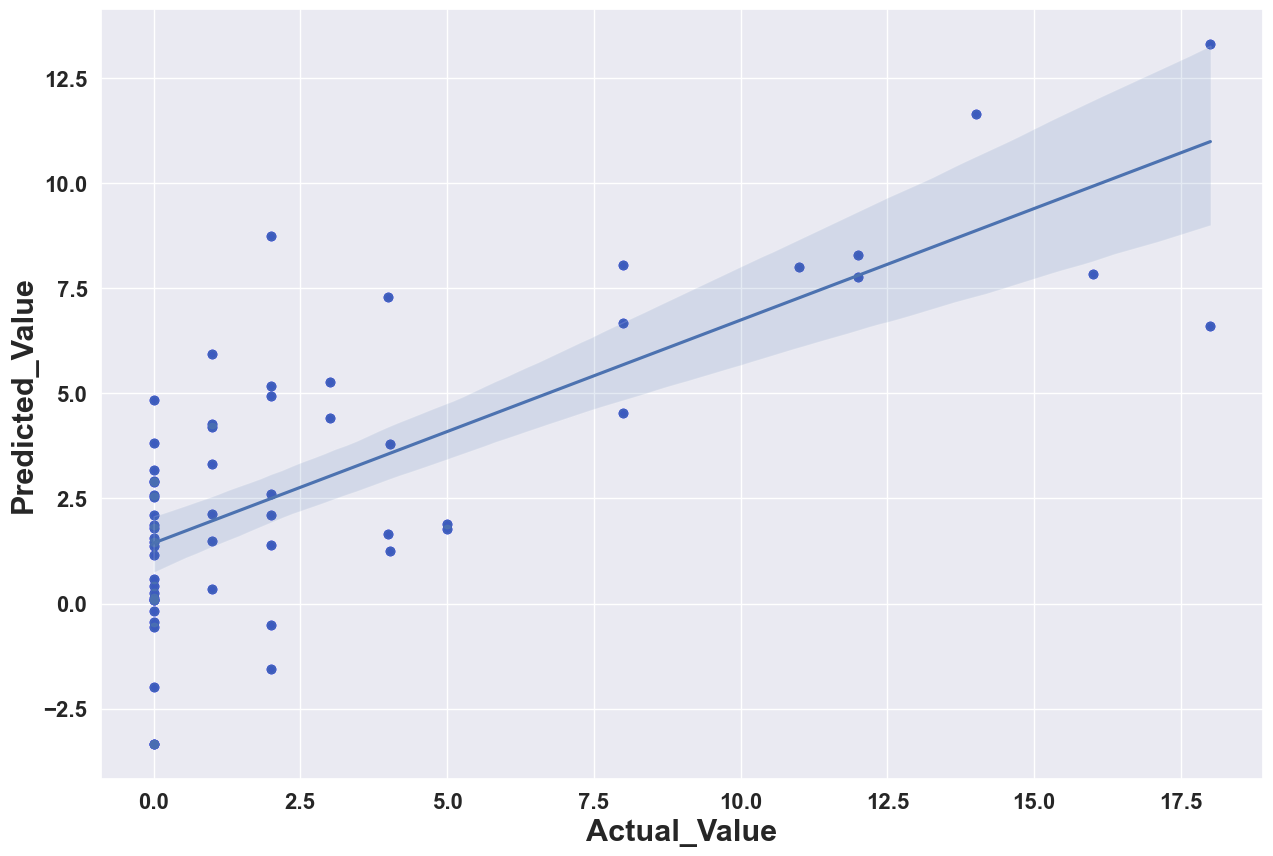

'\nexplainer1 = shap.Explainer(krr, X_train)\nshap_values1 = explainer1 (X_train)\nshap.plots.bar(shap_values1,max_display=20)\nshap.plots.beeswarm(shap_values1, max_display=20)\nshap.plots.waterfall(shap_values1[20], max_display=20)\n\n'

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = krr.score(X_train, y_train)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


krr.fit(X_train, y_train)

'''
explainer1 = shap.Explainer(krr, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

'''

#SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm.fit(X_train, y_train)

print("Training")
y_pred= svm.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)
'''

Training
Mean absolute error = 2.17
Mean squared error = 18.84
Median absolute error = 0.4
Explain variance score = 0.3
R2 score = 0.16


'\nprint("Testing")\npred_test= regr.predict(X_test)\nres(y_test,pred_test)\n'

Testing r2:  0.15958773945749283
R_sq:  0.15958773945749283


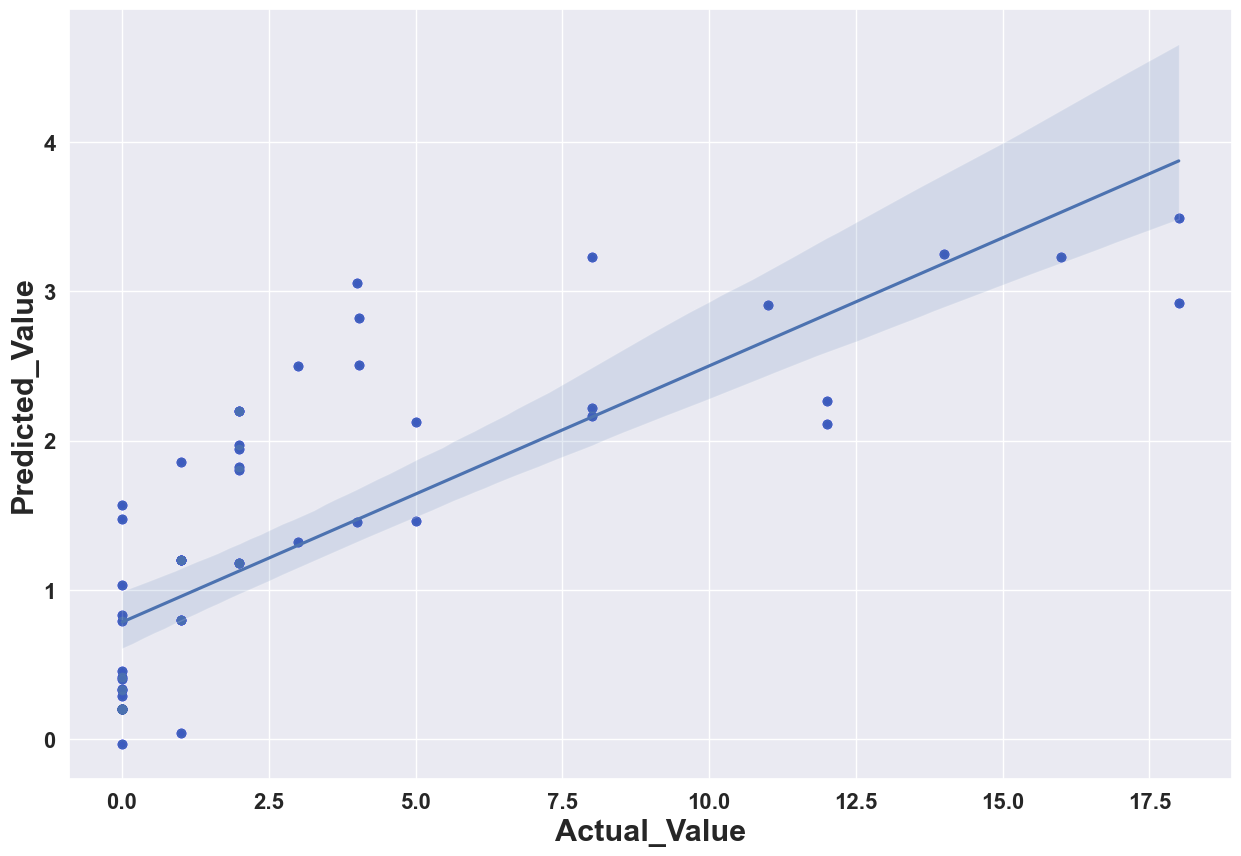

'\n\nexplainer1 = shap.Explainer(svm, X_train)\nshap_values1 = explainer1 (X_train)\nshap.plots.bar(shap_values1,max_display=20)\nshap.plots.beeswarm(shap_values1, max_display=20)\nshap.plots.waterfall(shap_values1[20], max_display=20)\n\n'

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = svm.score(X_train, y_train)
print("R_sq: ",r_sq)



import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


svm.fit(X_train, y_train)
'''

explainer1 = shap.Explainer(svm, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

'''


#Lasso

In [ ]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.1)
las.fit(X_train, y_train)

print("Training")
y_pred= las.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)
'''

Training
Mean absolute error = 2.48
Mean squared error = 10.59
Median absolute error = 2.15
Explain variance score = 0.53
R2 score = 0.53


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+01, tolerance: 1.323e-01


'\nprint("Testing")\npred_test= regr.predict(X_test)\nres(y_test,pred_test)\n'

Testing r2:  0.5275894586148172
R_sq:  0.5275894586148172


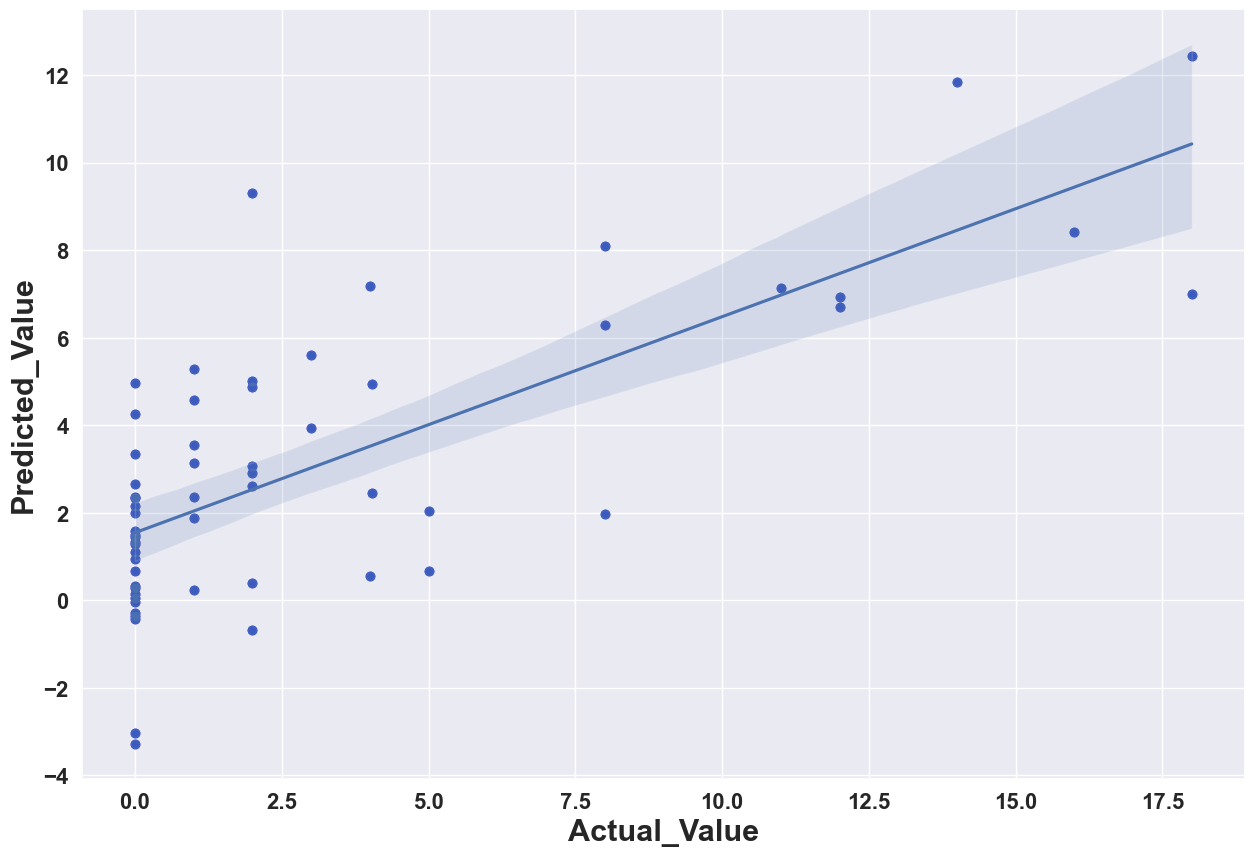

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+01, tolerance: 1.323e-01


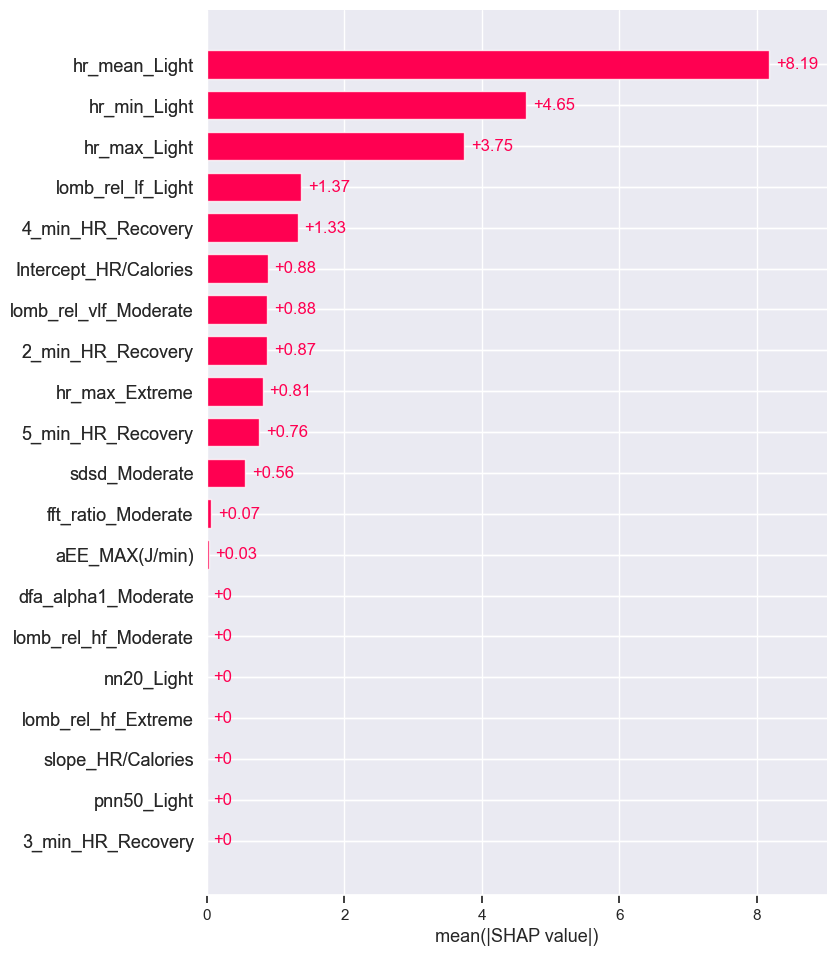

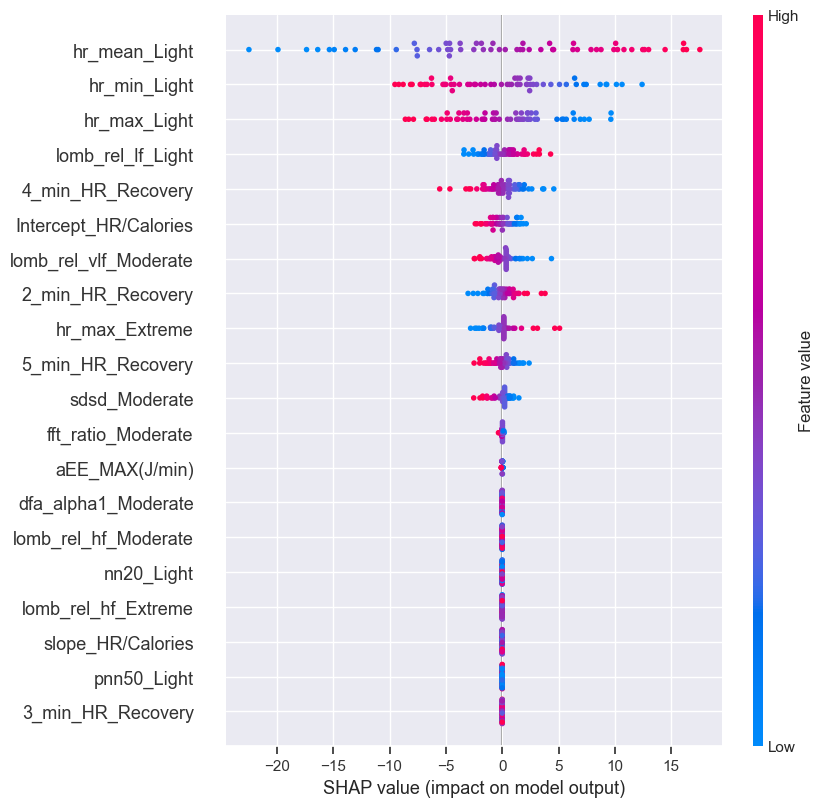

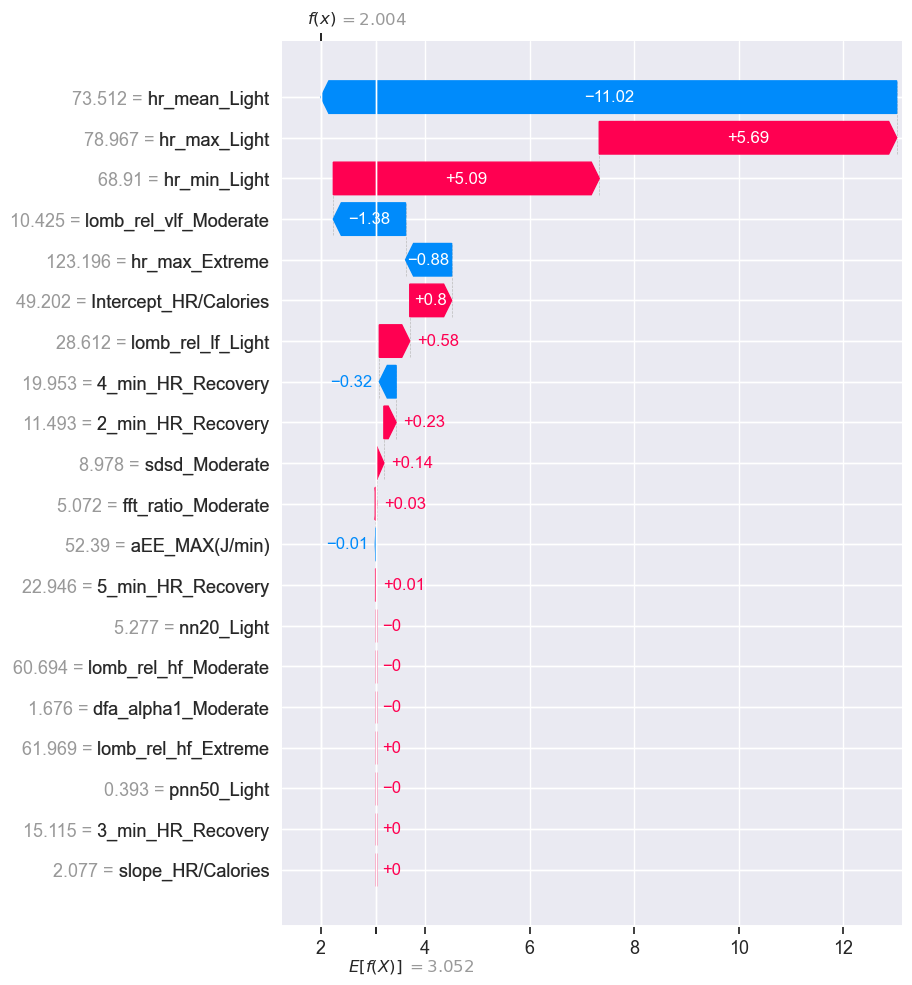

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = las.score(X_train, y_train)
print("R_sq: ",r_sq)



import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


las.fit(X_train, y_train)


explainer1 = shap.Explainer(las, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=50)
shap.plots.beeswarm(shap_values1, max_display=50)
shap.plots.waterfall(shap_values1[20], max_display=50)

